In [1]:
import numpy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("/home/youssef/project/archive/Loan_status_2007-2020Q3.csv", nrows = 20000)

In [3]:
# Display the first few rows of the dataset
df.head()

,Unnamed: 0,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag
0,0,1077501,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
1,1,1077430,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
2,2,1077175,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
3,3,1076863,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
4,4,1075358,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N


In [4]:
# Display the column names
df.columns

Index(['Unnamed: 0', 'id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'hardship_start_date', 'hardship_end_date', 'payment_plan_start_date',
       'hardship_length', 'hardship_dpd', 'hardship_loan_status',
       'orig_projected_additional_accrued_interest',
       'hardship_payoff_balance_amount', 'hardship_last_payment_amount',
       'debt_settlement_flag'],
      dtype='object', length=142)

In [5]:
# Columns to drop
columns_to_drop = [
    'Unnamed: 0',  # Index or row number
    'id',          # Unique identifier
    'grade',       # Risk category
    'sub_grade',   # Sub-category of risk
    'int_rate',    # Interest rate
    'installment', # Monthly payment amount
    'funded_amnt', 'funded_amnt_inv',  # Funding amounts
    'total_pymnt', 'total_rec_prncp', 'total_rec_int',  # Total payments
    'hardship_start_date', 'hardship_end_date', 'payment_plan_start_date',  # Hardship and payment dates
    'hardship_length', 'hardship_dpd', 'hardship_loan_status',  # Hardship details
    'orig_projected_additional_accrued_interest', 'hardship_payoff_balance_amount', 'hardship_last_payment_amount', # Hardship amounts
    'debt_settlement_flag' # Debt settlement indicator
]

# Drop the columns
df_cleaned = df.drop(columns=columns_to_drop)

# Filter the DataFrame
df_cleaned = df_cleaned[df_cleaned['loan_status'].isin(['Fully Paid', 'Charged Off'])]

# Verify the remaining columns
df_cleaned.columns

Index(['loan_amnt', 'term', 'emp_title', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'pymnt_plan',
       ...
       'sec_app_open_act_il', 'sec_app_num_rev_accts',
       'sec_app_chargeoff_within_12_mths',
       'sec_app_collections_12_mths_ex_med', 'hardship_flag', 'hardship_type',
       'hardship_reason', 'hardship_status', 'deferral_term',
       'hardship_amount'],
      dtype='object', length=121)

In [6]:
# Print all column names
print(df_cleaned.columns.tolist())

['loan_amnt', 'term', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'url', 'purpose', 'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line', 'fico_range_low', 'fico_range_high', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt_inv', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d', 'last_fico_range_high', 'last_fico_range_low', 'collections_12_mths_ex_med', 'mths_since_last_major_derog', 'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_act_il', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open

In [7]:
# Additional columns to drop
additional_columns_to_drop = [
    'url', 'issue_d', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d',
    'out_prncp', 'out_prncp_inv', 'total_pymnt_inv', 'total_rec_late_fee',
    'recoveries', 'collection_recovery_fee',
    'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'revol_bal_joint',
    'sec_app_fico_range_low', 'sec_app_fico_range_high', 'sec_app_earliest_cr_line',
    'total_rev_hi_lim', 'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
    'total_il_high_credit_limit',
    'num_rev_accts', 'num_op_rev_tl', 'num_actv_rev_tl', 'num_bc_tl', 'num_il_tl',
    'num_bc_sats', 'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m',
    'num_tl_op_past_12m',
    'hardship_flag', 'hardship_type', 'hardship_reason', 'hardship_status',
    'deferral_term', 'hardship_amount',
    'policy_code' # contains only 1 and nan
]

# Drop the columns
df_cleaned = df_cleaned.drop(columns=additional_columns_to_drop)

In [8]:
df_cleaned.describe()

,loan_amnt,annual_inc,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,...,pub_rec_bankruptcies,tax_liens,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med
count,20000.000000,2.000000e+04,20000.000000,20000.000000,20000.00000,20000.00000,20000.000000,6750.000000,1045.000000,20000.000000,...,20000.000000,20000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,12142.397500,6.946990e+04,13.873362,0.149700,714.89000,718.89000,0.818250,36.957630,94.866986,9.397550,...,0.044650,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,8297.889277,4.671540e+04,6.715703,0.514007,35.49628,35.49628,1.025802,21.541835,19.977011,4.365118,...,0.207505,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1000.000000,6.000000e+03,0.000000,0.000000,660.00000,664.00000,0.000000,1.000000,11.000000,2.000000,...,0.000000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,6000.000000,4.200000e+04,8.730000,0.000000,685.00000,689.00000,0.000000,19.000000,89.000000,6.000000,...,0.000000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,10000.000000,6.000000e+04,13.930000,0.000000,710.00000,714.00000,0.000000,35.000000,99.000000,9.000000,...,0.000000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,16000.000000,8.400000e+04,19.130000,0.000000,740.00000,744.00000,1.000000,53.000000,109.000000,12.000000,...,0.000000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,35000.000000,1.782000e+06,29.990000,11.000000,825.00000,829.00000,8.000000,120.000000,119.000000,39.000000,...,2.000000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 80 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   loan_amnt                           20000 non-null  int64  
 1   term                                20000 non-null  object 
 2   emp_title                           18678 non-null  object 
 3   emp_length                          19301 non-null  object 
 4   home_ownership                      20000 non-null  object 
 5   annual_inc                          20000 non-null  float64
 6   verification_status                 20000 non-null  object 
 7   loan_status                         20000 non-null  object 
 8   pymnt_plan                          20000 non-null  object 
 9   purpose                             20000 non-null  object 
 10  title                               20000 non-null  object 
 11  zip_code                            20000

In [10]:
empty_columns = df_cleaned.columns[df_cleaned.isnull().all()]
print(f'Empty columns: {empty_columns.tolist()}')
df_cleaned = df_cleaned.drop(columns=empty_columns)
print(df_cleaned.columns)

Empty columns: ['mths_since_last_major_derog', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_act_il', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'inq_fi', 'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq', 'mths_since_recent_inq', 'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_rev_tl_bal_gt_0', 'pct_tl_nvr_dlq', 'percent_bc_gt_75', 'sec_app_inq_last_6mths', 'sec_app_mort_acc', 'sec_app_open_acc', 'sec_app_revol_util', 'sec_app_open_act_il', 'sec_app_num_rev_accts', 'sec_app_chargeoff_within_12_mths', 'sec_app_collections_12_mths_ex_med']
Index(['loan_amnt', 'term', 'emp_title', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'loan

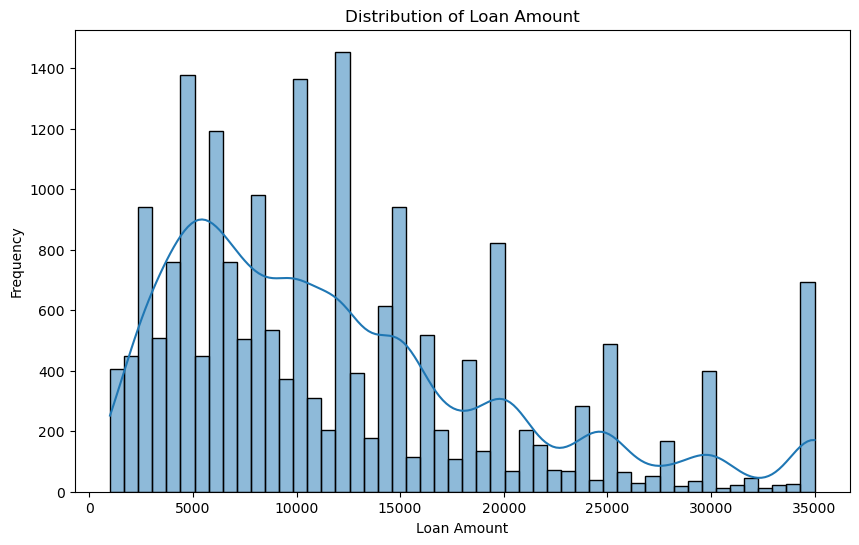

In [11]:
# Plot histogram for a numerical feature
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['loan_amnt'], bins=50, kde=True)
plt.title('Distribution of Loan Amount')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.show()


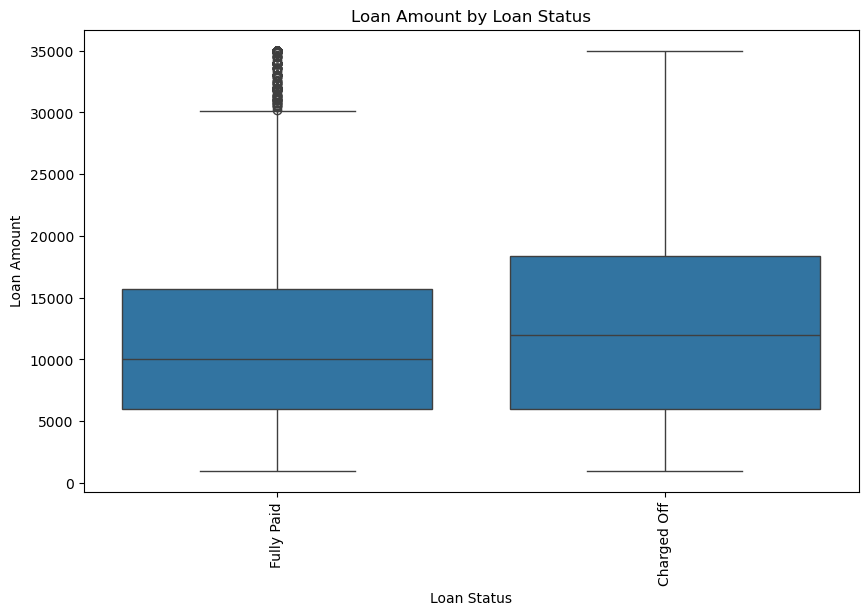

In [12]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='loan_status', y='loan_amnt', data=df_cleaned)
plt.title('Loan Amount by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Loan Amount')
# Rotate x-axis labels to vertical
plt.xticks(rotation=90)
plt.show()

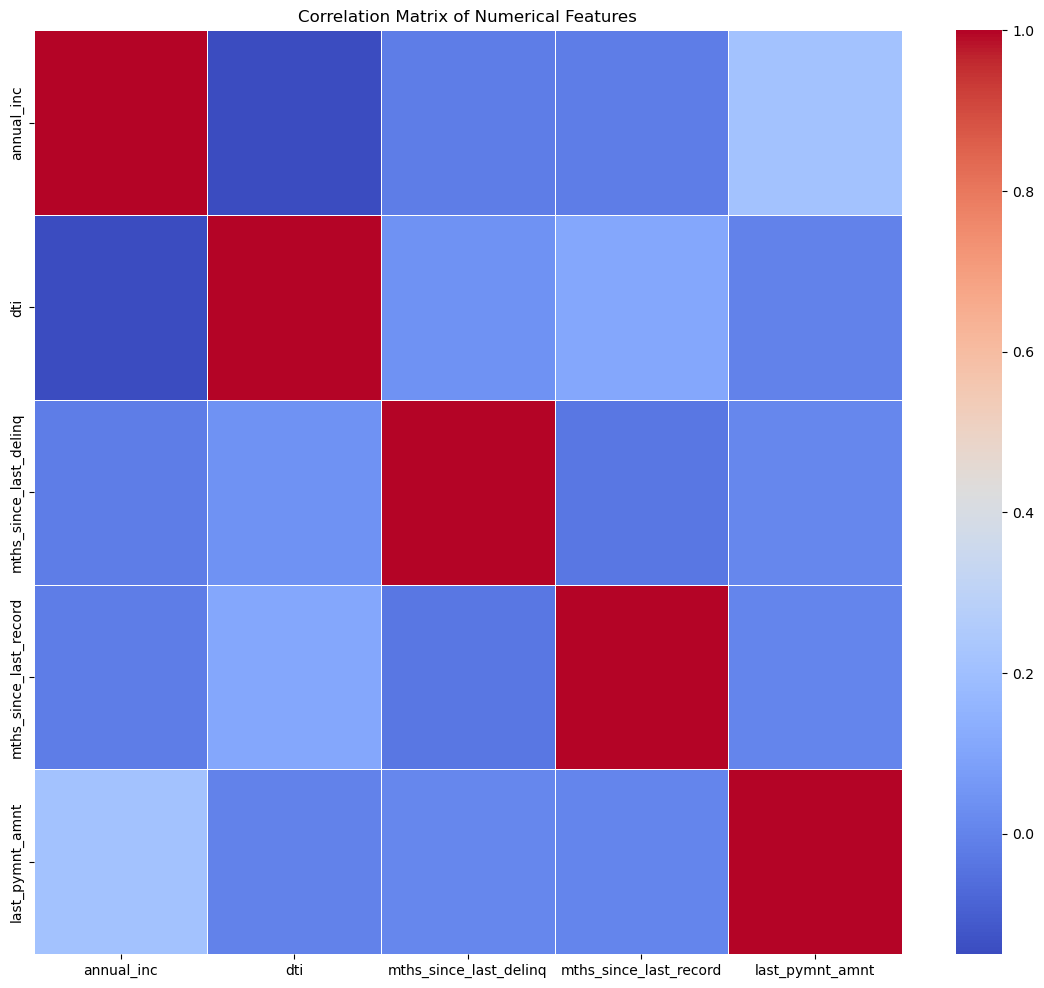

In [13]:
numerical_cols = df_cleaned.select_dtypes(include=['float64']).columns
df_numerical = df_cleaned[numerical_cols]
correlation_matrix = df_numerical.corr()

plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()


In [14]:
print(df_cleaned['loan_status'].unique())

['Fully Paid' 'Charged Off']


In [15]:
# Map loan status to binary values
df_cleaned['loan_status'] = df_cleaned['loan_status'].map({'Fully Paid': 0, 'Charged Off': 1})

# Verify the change
print(df_cleaned['loan_status'].unique())

[0 1]


In [16]:
df.shape

(20000, 142)

In [17]:
df_cleaned.shape

(20000, 37)

In [18]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 37 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   loan_amnt                   20000 non-null  int64  
 1   term                        20000 non-null  object 
 2   emp_title                   18678 non-null  object 
 3   emp_length                  19301 non-null  object 
 4   home_ownership              20000 non-null  object 
 5   annual_inc                  20000 non-null  float64
 6   verification_status         20000 non-null  object 
 7   loan_status                 20000 non-null  int64  
 8   pymnt_plan                  20000 non-null  object 
 9   purpose                     20000 non-null  object 
 10  title                       20000 non-null  object 
 11  zip_code                    20000 non-null  object 
 12  addr_state                  20000 non-null  object 
 13  dti                         200

In [49]:
object_columns = df_cleaned.select_dtypes(include=['object']).columns
print(object_columns)

Index(['term', 'emp_title', 'emp_length', 'home_ownership',
       'verification_status', 'pymnt_plan', 'purpose', 'title', 'zip_code',
       'addr_state', 'earliest_cr_line', 'revol_util', 'initial_list_status',
       'application_type'],
      dtype='object')


In [77]:
df_cleaned.application_type.unique()

array(['Individual'], dtype=object)

In [56]:
df_encoded = pd.get_dummies(df_cleaned, columns=object_columns, drop_first=True)

In [57]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Columns: 26388 entries, loan_amnt to revol_util_99.9%
dtypes: bool(26365), float64(5), int64(18)
memory usage: 506.4 MB


In [59]:
df_cleaned.shape

(20000, 37)